In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pii-detection-removal-from-educational-data/sample_submission.csv
/kaggle/input/pii-detection-removal-from-educational-data/train.json
/kaggle/input/pii-detection-removal-from-educational-data/test.json


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [3]:
df = pd.read_json("/kaggle/input/pii-detection-removal-from-educational-data/train.json")

In [4]:
df

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."
...,...,...,...,...,...
6802,22678,EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE My w...,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[True, True, True, False, False, True, True, F...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6803,22679,Why Mind Mapping?\n\nMind maps are graphical r...,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[True, True, False, False, False, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6804,22681,"Challenge\n\nSo, a few months back, I had chos...","[Challenge, \n\n, So, ,, a, few, months, back,...","[False, False, False, True, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6805,22684,Brainstorming\n\nChallenge & Selection\n\nBrai...,"[Brainstorming, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [5]:
#makes a dictionary of all values to a particular category

tokens = defaultdict(list)
for t, l in zip(df["tokens"], df["labels"]):
    for t1, l1 in zip(t, l):
        if l1 != "O":
            tokens[l1.split("-")[1]].append(t1)

In [6]:
#counts unique labels in each category

print("Number of unique labels:")
{k: len(set(v)) for k,v in tokens.items()}

Number of unique labels:


{'NAME_STUDENT': 1269,
 'URL_PERSONAL': 96,
 'EMAIL': 26,
 'ID_NUM': 68,
 'USERNAME': 5,
 'PHONE_NUM': 9,
 'STREET_ADDRESS': 18}

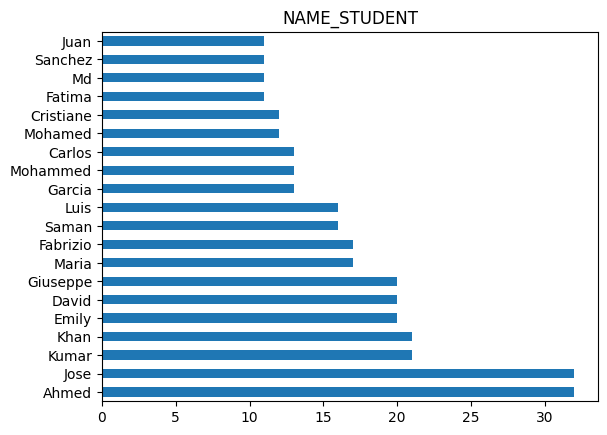

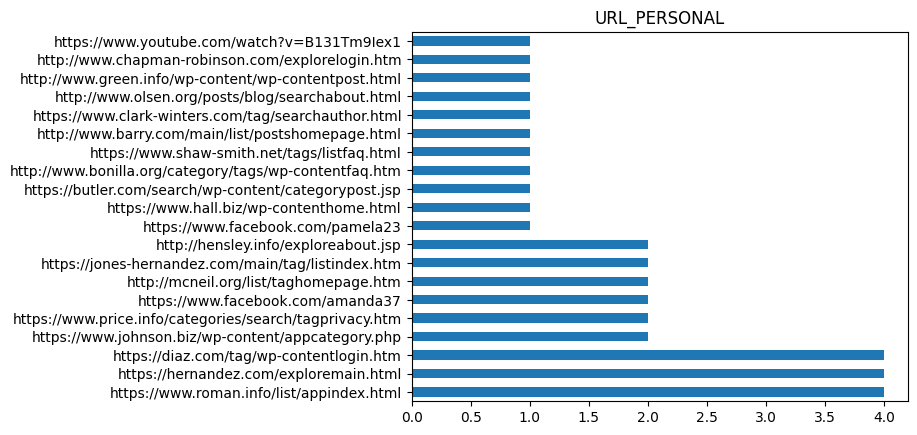

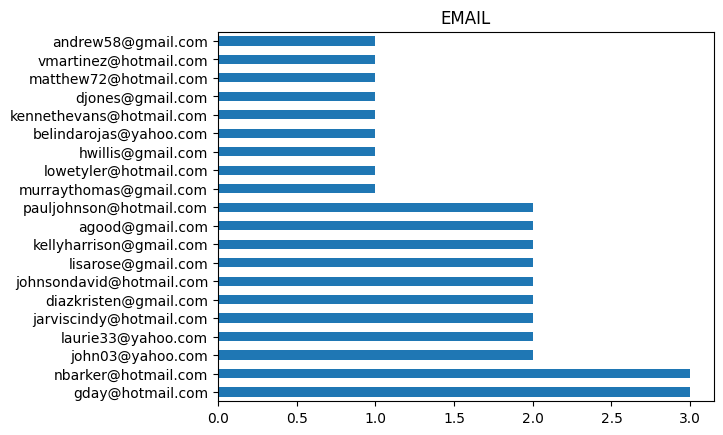

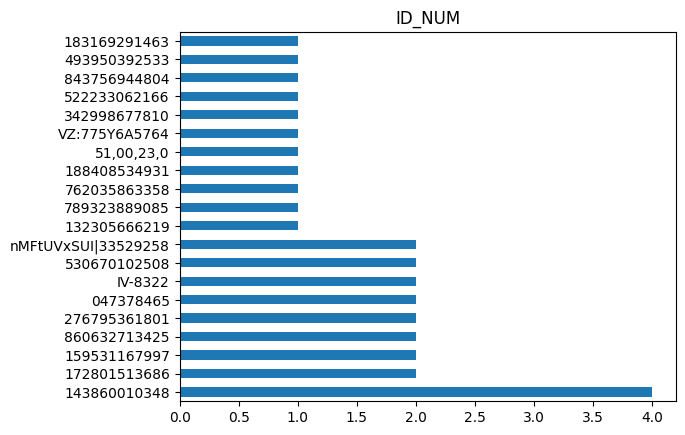

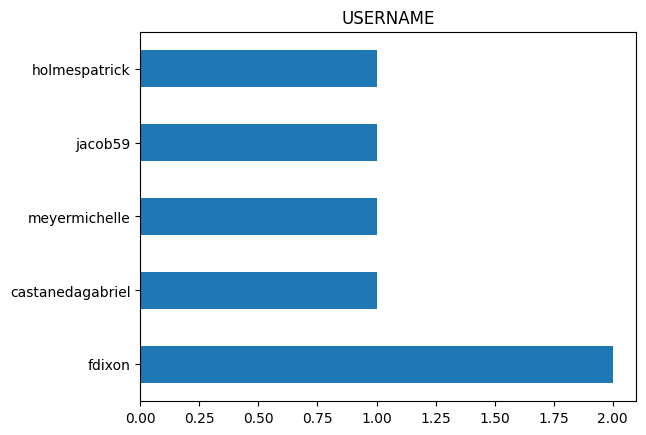

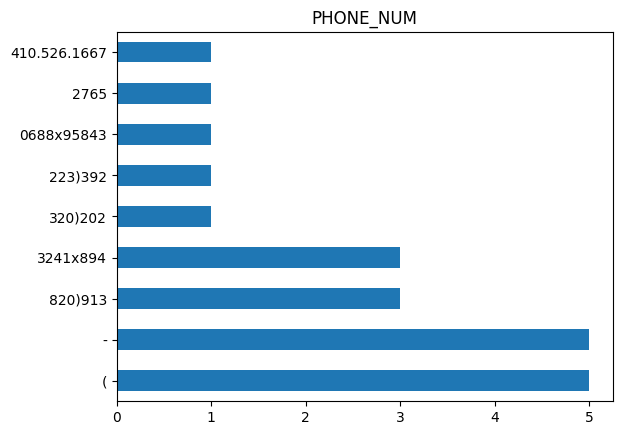

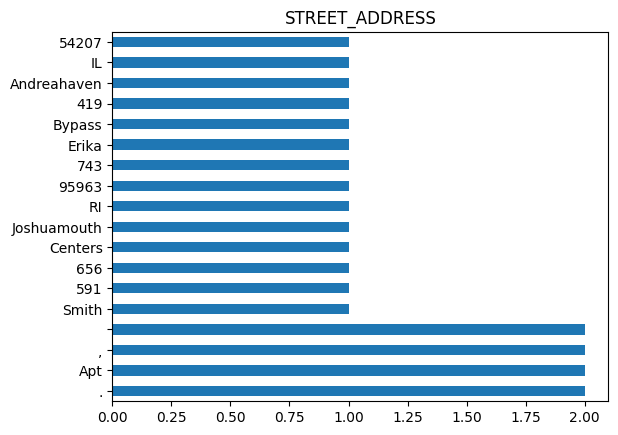

In [7]:
for a, b in tokens.items():
    pd.Series(b).value_counts()[:20].plot.barh();
    plt.title(a)
    plt.show()

In [8]:
pd.Series(tokens['ID_NUM']).value_counts()[:20]

143860010348           4
172801513686           2
159531167997           2
860632713425           2
276795361801           2
047378465              2
IV-8322                2
530670102508           2
nMFtUVxSUI|33529258    2
132305666219           1
789323889085           1
762035863358           1
188408534931           1
51,00,23,0             1
VZ:775Y6A5764          1
342998677810           1
522233062166           1
843756944804           1
493950392533           1
183169291463           1
Name: count, dtype: int64

In [9]:
len(tokens['ID_NUM'])

79

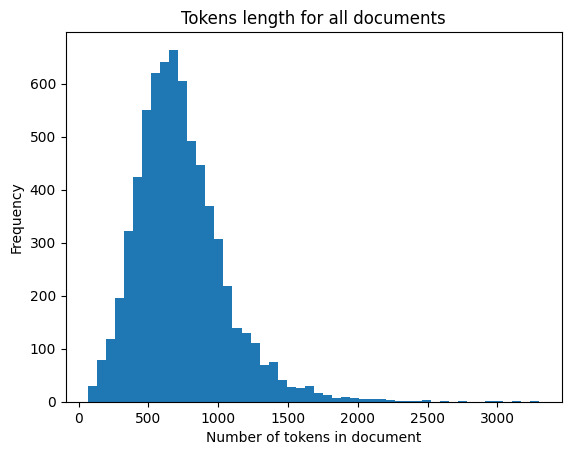

In [10]:
df["tokens"].apply(len).plot.hist(bins=50)
plt.xlabel("Number of tokens in document")
plt.title("Tokens length for all documents");

In [68]:
a = set()
for i in df['labels']:
    for j in i:
        a.add(j)

b = list(a)

In [112]:
temp = np.zeros(shape=(6807,13), dtype=int)
df2 = pd.DataFrame(data = temp, columns = [b])

In [126]:
for i in range(0,len(df['labels'])):
        t = set(df.iloc[i,4])
        for j in t:
            df2.loc[i,str(j)] = 1

In [135]:
df2['O'].value_counts()

(O,)
1       6807
Name: count, dtype: int64

In [136]:
df2 = df2.drop(['O'],axis=1)

/tmp/ipykernel_34/1814349633.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df2 = df2.drop(['O'],axis=1)


In [137]:
df2

,B-USERNAME,B-STREET_ADDRESS,I-PHONE_NUM,B-EMAIL,I-ID_NUM,B-URL_PERSONAL,B-PHONE_NUM,I-NAME_STUDENT,I-URL_PERSONAL,B-NAME_STUDENT,I-STREET_ADDRESS,B-ID_NUM
0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0,0,0,0,0,0,0,0,0,0,0,0
6803,0,0,0,0,0,0,0,0,0,0,0,0
6804,0,0,0,0,0,0,0,0,0,0,0,0
6805,0,0,0,0,0,0,0,0,0,0,0,0


In [164]:
final_df = pd.concat([df,df2],axis=1)

In [165]:
final_df.head()

,document,full_text,tokens,trailing_whitespace,labels,"(B-USERNAME,)","(B-STREET_ADDRESS,)","(I-PHONE_NUM,)","(B-EMAIL,)","(I-ID_NUM,)","(B-URL_PERSONAL,)","(B-PHONE_NUM,)","(I-NAME_STUDENT,)","(I-URL_PERSONAL,)","(B-NAME_STUDENT,)","(I-STREET_ADDRESS,)","(B-ID_NUM,)"
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",0,0,0,0,0,0,0,1,0,1,0,0
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",0,0,0,0,0,0,0,1,0,1,0,0
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",0,0,0,0,0,0,0,1,0,1,0,0
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",0,0,0,0,0,0,0,1,0,1,0,0
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...",0,0,0,0,0,0,0,1,0,1,0,0


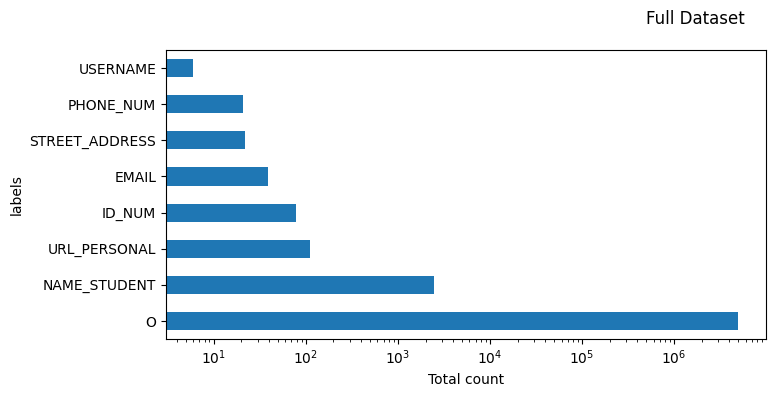

In [162]:
total_counts = df["labels"].apply(lambda x: [i.split("-")[1] if i != "O" else i for i in x]).explode().value_counts()

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
total_counts.plot.barh()
plt.xlabel("Total count")
plt.xscale("log")

plt.suptitle("Full Dataset")
plt.tight_layout();